For dataset1


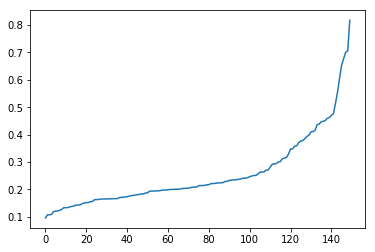

Esp :0.49
Number of clusters formed :3
Noise points :0
Purity is :1.0
NMI :1.0
Cluster 0 size :50
Cluster 1 size :50
Cluster 2 size :50

For dataset2


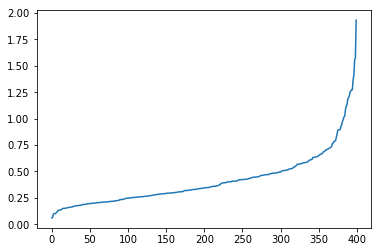

Esp :0.6
Number of clusters formed :4
Noise points :28
Purity is :0.9325
NMI :0.953123843826
Cluster 0 size :50
Cluster 1 size :267
Cluster 2 size :50
Cluster 3 size :6

For dataset3


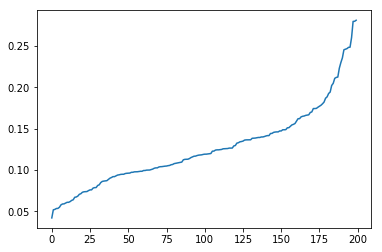

Esp :0.2
Number of clusters formed :2
Noise points :1
Purity is :1.0
NMI :1.0
Cluster 0 size :100
Cluster 1 size :100


In [18]:
# =======================================================================
from KMeans import KMeans
from DataPoints import DataPoints
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# =======================================================================
class DBSCAN:
    # -------------------------------------------------------------------
    def __init__(self):
        self.e = 0.0
        self.minPts = 3
        self.noOfLabels = 0
    # -------------------------------------------------------------------
    def main(self, args):
        seed = 71
        print("For dataset1")
        dataSet = KMeans.readDataSet("dataset1.txt")
        random.Random(seed).shuffle(dataSet)
        self.noOfLabels = DataPoints.getNoOFLabels(dataSet)
        self.getEpsilonFromCurve(dataSet)
        #self.e = self.getEpsilon(dataSet)
        #set e manully according to curve
        self.e = 0.49
        print("Esp :" + str(self.e))
        self.dbscan(dataSet,1)

        print("\nFor dataset2")
        dataSet = KMeans.readDataSet("dataset2.txt")
        random.Random(seed).shuffle(dataSet)
        self.noOfLabels = DataPoints.getNoOFLabels(dataSet)
        self.getEpsilonFromCurve(dataSet)
        #self.e = self.getEpsilon(dataSet)
        #set e manully according to curve
        self.e = 0.6
        print("Esp :" + str(self.e))
        self.dbscan(dataSet,2)

        print("\nFor dataset3")
        dataSet = KMeans.readDataSet("dataset3.txt")
        random.Random(seed).shuffle(dataSet)
        self.noOfLabels = DataPoints.getNoOFLabels(dataSet)
        self.getEpsilonFromCurve(dataSet)
        #set e manully according to curve
        #self.e = self.getEpsilon(dataSet)
        self.e = 0.2
        print("Esp :" + str(self.e))
        self.dbscan(dataSet,3)
    # -------------------------------------------------------------------
    #==============method 1: find the mean of disNearest4th as eps
    def getEpsilon(self, dataSet):
        
        sumOfDist = 0.0
        # ****************Please Fill Missing Lines Here*****************
        #dis between a point with its 4th nearest neighbour
        disNearestKth = self.find_Kth_nearestDis(dataSet,4)
        sumOfDist = sum(disNearestKth)
        
        return sumOfDist/len(dataSet)
    # -------------------------------------------------------------------
    #==============method 2: draw graph to find eps
    def getEpsilonFromCurve(self, dataSet):
        #dis between a point with its 4th nearest neighbour
        disNearestKth = self.find_Kth_nearestDis(dataSet,4)
        disNearestKth_sorted = sorted(disNearestKth)
        #x-axis: index of disNearestKth_sorted, y-axis:value of disNearestKth_sorted
        x = np.arange(0, len(dataSet), 1)
        plt.plot(x, disNearestKth_sorted)
        plt.show()
    
    # -------------------------------------------------------------------
    def find_Kth_nearestDis(self, dataSet,k):
        #4th nearest dis of all the points in dataset
        disNearestKth = []
        #dis between point i and all the other points
        distances = []
        for i in range(len(dataSet)):
            #compute dis of point i with all other points, and find the 4th nearest dis
            for j in range(len(dataSet)):
                distances.append(self.getEuclideanDist(dataSet[i].x, dataSet[i].y, dataSet[j].x, dataSet[j].y))
            #since the smallest dis is itself, so pick the k-index value of the sorted dis
            distances = sorted(distances)
            disNearestKth.append(distances[k])
            distances = []
        return disNearestKth
    # -------------------------------------------------------------------
    def dbscan(self, dataSet, datasetID):
        clusters = []
        visited = set()
        noise = set()

        # Iterate over data points
        for i in range(len(dataSet)):
            point = dataSet[i]
            if point in visited:
                continue
            #until find an unvisited point, do below
            #mark this unvisited as visited
            visited.add(point)
            #store Neighbours points
            N = []
            minPtsNeighbours = 0

            # check which point satisfies minPts condition, traverse all points except itself
            #calculate a neighbour set N of point i's neighbour
            for j in range(len(dataSet)):
                if i==j:
                    continue
                pt = dataSet[j]
                dist = self.getEuclideanDist(point.x, point.y, pt.x, pt.y)
                if dist <= self.e:
                    minPtsNeighbours += 1
                    N.append(pt)
            
            # if point i have enough neibours,i is not a noise point, so add a new cluster
            if minPtsNeighbours >= self.minPts:
                cluster = set()
                cluster.add(point)
                point.isAssignedToCluster = True

                j = 0
                #traver the neighbours of point i
                #Neighbours1 represent neighbours's neighbour
                #N beome larger each loop. neighbour's n's n's n .... all will add to N
                while j < len(N):
                    #point1 is point i 's neighbour
                    point1 = N[j]
                    #actual num of neighbours
                    minPtsNeighbours1 = 0
                    N1 = []
                    #if unvisited
                    if not point1 in visited:
                        visited.add(point1)
                        for l in range(len(dataSet)):
                            pt = dataSet[l]
                            dist = self.getEuclideanDist(point1.x, point1.y, pt.x, pt.y)
                            if dist <= self.e:
                                minPtsNeighbours1 += 1
                                N1.append(pt)
                        if minPtsNeighbours1 >= self.minPts:
                            #put point i's Neighbour's neighbour exsits, put them in as point i's Neighbour's and remove duplicares
                            self.removeDuplicates(N, N1)
                        else:
                            N1 = []
                    # Add point1 is not yet member of any other cluster then add it to cluster
                    if not point1.isAssignedToCluster:
                        cluster.add(point1)
                        point1.isAssignedToCluster = True
                    j += 1
                # add cluster to the list of clusters
                clusters.append(cluster)

            else:
                noise.add(point)

            N = []

        # List clusters
        print("Number of clusters formed :" + str(len(clusters)))
        print("Noise points :" + str(len(noise)))

        # Calculate purity
        maxLabelCluster = []
        for j in range(len(clusters)):
            maxLabelCluster.append(KMeans.getMaxClusterLabel(clusters[j]))
        purity = 0.0
        for j in range(len(clusters)):
            purity += maxLabelCluster[j]
        purity /= len(dataSet)
        print("Purity is :" + str(purity))

        nmiMatrix = DataPoints.getNMIMatrix(clusters, self.noOfLabels)
        nmi = DataPoints.calcNMI(nmiMatrix)
        print("NMI :" + str(nmi))

        DataPoints.writeToFile(noise, clusters, "DBSCAN_dataset"+str(datasetID)+".csv")
    # -------------------------------------------------------------------
    def removeDuplicates(self, n, n1):
        for point in n1:
            isDup = False
            for point1 in n:
                if point1 == point:
                    isDup = True
            if not isDup:
                n.append(point)
    # -------------------------------------------------------------------
    def getEuclideanDist(self, x1, y1, x2, y2):
        dist = math.sqrt(pow((x2-x1), 2) + pow((y2-y1), 2))
        return dist
# =======================================================================
if __name__ == "__main__":
    d = DBSCAN()
    d.main(None)